<a href="https://colab.research.google.com/github/pavanramadass/machine-learning-projects/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1:
https://keras.io/api/models/

This was the website I used to learn and complete this assignment. I decided to use the Keras Framework due to it being the most updated framework. 
I needed this resource to create the 2-layer Neural Network, because I needed to know how to create a neural network with the keras framework. 

Task 2

In [ ]:
# Data Set:
# https://www.kaggle.com/nareshbhat/wine-quality-binary-classification

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from google.colab import files
import io

# Data Preprocessing
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['wine.csv']))

X = data.iloc[:, : -1].values
y = data.iloc[:, -1].values

# Exploratory Data Analysis
# Checking for any missing data or wrong data-types that may need fixing 
data.info()

# Encoding the "Quality" column to 0s and 1s, because they are of type string
le = LabelEncoder()
y = le.fit_transform(y) 

# Splitting Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Neural Network

# initializing the NN
model = Sequential()

# Adding the input layer and the first hidden layer 
model.add(Dense(100, activation='relu'))

# Adding the second hidden layer
model.add(Dense(100, activation='relu'))

# Adding the output layer
model.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Phase 
model_output = model.fit(X_train, y_train, epochs=30, batch_size=20, verbose=1)

# Testing Phase                          
y_pred = model.predict(X_test)

print("Actual Test Results")
#print(y_test)

print("Neural Network Test Results")
#print(y_pred)

# Cost/Loss function plotting
loss_values = model_output.history['loss']
epochs = range(1, 31)

plt.plot(epochs, loss_values, label='Cost Function of Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

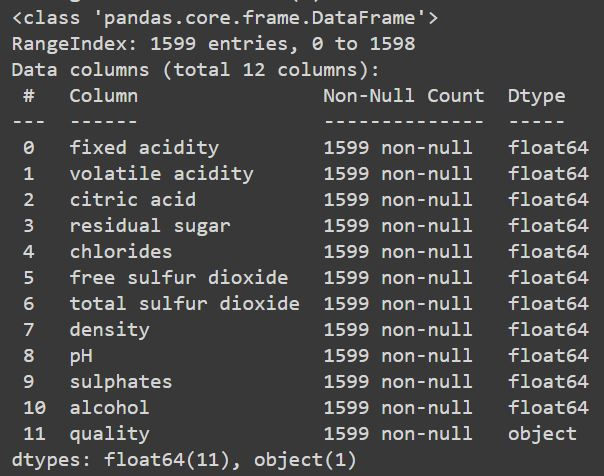

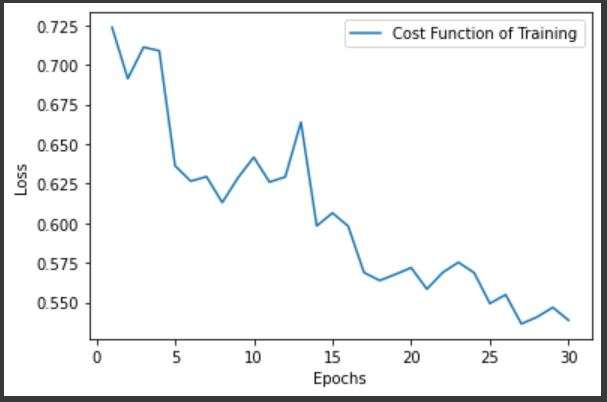

Task 3:

The hyperparameters I chose were mostly based on educated guessing from previous experience. 

For my activation functions, the two hidden layers use the relu activation function due to making the neural network have a more linear behavior, thus making the neural network easier to optimize. And, the output layer uses the sigmoid activation function, because this function has output range of 0 to 1. Thus, this is perfect for the wine quality test. Not all wine will be 100% good nor 100% bad, therefore with the sigmoid function, the neural network would provide a more accurate labelling to the quality of the wine. 

For my cost/loss function, I used binary_crossentropy because my output is of a binary nature. 

Based on the size and complexity of the dataset and the task of determining wine quality, I hypothesized that having 30 training epochs with a batch size of 25 would be enough to produce satisfying results. Any higher may give better results, but I hypothesized that the results would only be slightly better since training is like a logarithmic function where after sometime the training accuracy plateaus no matter how much you increase the epochs and batch size. 

I did not use any regularization, because the data set I used did not appear to me to be a very noisy data set. The use of regularizers is to reduce overfitting of data. The use of regularizers is best for data that can be very noisy like stock prediction data. But, for very low noisy data sets like wine quality prediction, I decided to leave out the usage of any regularizer. 

I used the Adam optimizer algorithm, because it requires less memory space than most optimizers. This feature appealed to me, since my computer does not have a lot of memory. So, when working with Deep Learning, trying to reduce the amount of memory I need to use is better. 